In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info() #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.drop('Id', axis=1, inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

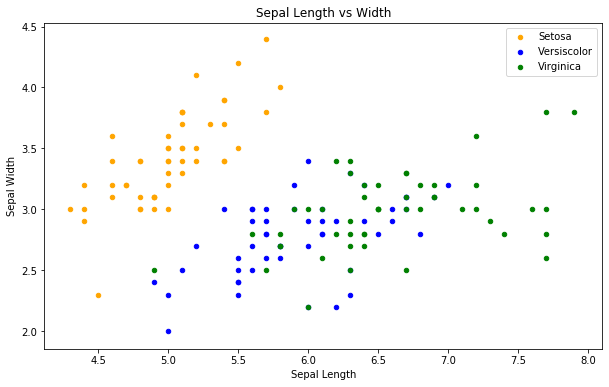

In [6]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x= 'SepalLengthCm', y= 'SepalWidthCm', color='orange', label= 'Setosa')

iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x= 'SepalLengthCm', y= 'SepalWidthCm', color='blue', label= 'Versiscolor', ax=fig)

iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x= 'SepalLengthCm', y= 'SepalWidthCm', color='green', label= 'Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Width')
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

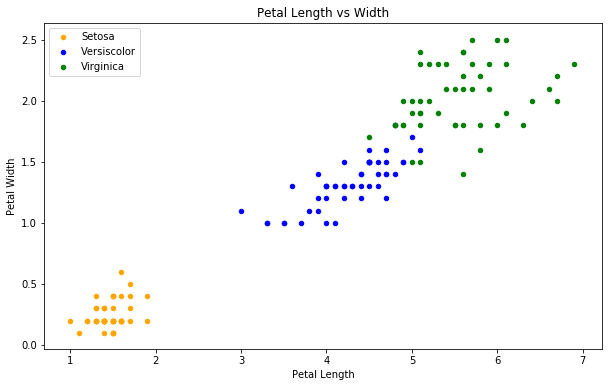

In [7]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x= 'PetalLengthCm', y= 'PetalWidthCm', color='orange', label= 'Setosa')

iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x= 'PetalLengthCm', y= 'PetalWidthCm', color='blue', label= 'Versiscolor', ax=fig)

iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x= 'PetalLengthCm', y= 'PetalWidthCm', color='green', label= 'Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Width')
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

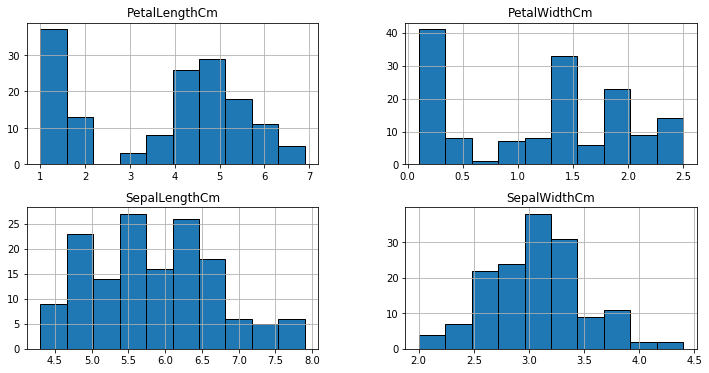

In [8]:
iris.hist(edgecolor= 'black', linewidth= 1)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

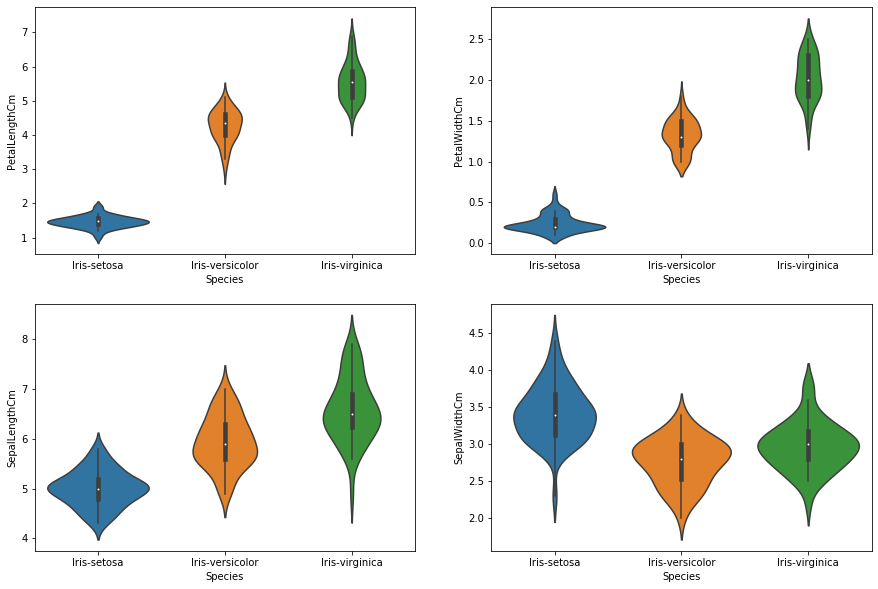

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [11]:
iris.shape

(150, 5)

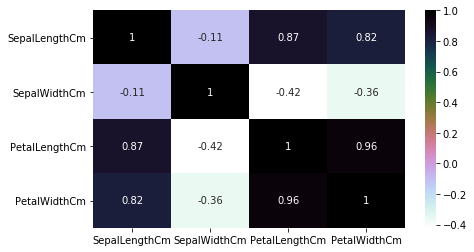

In [12]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [13]:
train, test = train_test_split(iris, test_size= 0.2)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [14]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species 

test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y =test.Species

In [15]:
#SVM

model = svm.SVC() #select algorithim
model.fit(train_X, train_y) #we train the algorithm with the training data and the training output
prediction = model.predict(test_X) #now we pass the testing data to the trained algorithm

print('The accuracy of the SVM is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is: 0.9333333333333333


In [16]:
#Logistic Regression

model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)

print('The accuracy of the Logistic Regression is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the Logistic Regression is: 0.9333333333333333


C:\Users\Connor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
#Decision Tree

model= DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('The accuracy of the Decision Tree is:', metrics.accuracy_score(prediction, test_y))

The accuracy of the Decision Tree is: 0.9333333333333333


In [18]:
#KNN

model= KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction=  model.predict(test_X)

print('The accuracy of the KNN IS:', metrics.accuracy_score(prediction, test_y))

The accuracy of the KNN IS: 0.9333333333333333


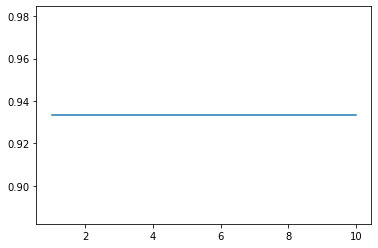

In [19]:
#Let's check the accuracy for various values of n for K-Nearest nerighbours

accs=[]
x=[1,2,3,4,5,6,7,8,9,10]

for i in range(1,11):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction=  model.predict(test_X)
    v=metrics.accuracy_score(prediction, test_y)
    accs.append(v)
    
    
plt.plot(x, accs)

In [20]:
#We used all the features of the iris dataset above, now we will use petals and sepals seperately
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [21]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [22]:
#SVM
model= svm.SVC()
model.fit(train_x_p, train_y_p)
prediction= model.predict(test_x_p)

print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s, train_y_s)
prediction= model.predict(test_x_s)

print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [23]:
#Logistic Regression

model= LogisticRegression()
model.fit(train_x_p, train_y_p)
prediction= model.predict(test_x_p)
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))


model= LogisticRegression()
model.fit(train_x_s, train_y_s)
prediction= model.predict(test_x_s)
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [24]:
#Decision Tree
model= DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
prediction=model.predict(test_x_p)

print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model = DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
prediction= model.predict(test_x_p)

print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.9555555555555556


In [25]:
#KNN
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333
